In [59]:
import warnings
from scipy.stats import shapiro
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

warnings.filterwarnings("ignore")

In [60]:
customer = pd.read_csv('./Dataset/Customer.csv',sep=';')
transaction = pd.read_csv('./Dataset/Transaction.csv',sep=';')
product = pd.read_csv('./Dataset/Product.csv',sep=';')
store = pd.read_csv('./Dataset/Store.csv',sep=';')

In [61]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [62]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [63]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [64]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [65]:
df = pd.merge(transaction, customer, on='CustomerID')
df = pd.merge(df, product, on='ProductID', suffixes=('_cust','_prod'))
df = pd.merge(df, store, on='StoreID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_cust,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_prod,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [66]:
column_name = {}
for i in df.columns:
    column_name[i] = i.lower().replace(' ','_')
df = df.rename(columns = column_name)
df.head()

,transactionid,customerid,date,productid,price_cust,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_prod,storename,groupstore,type,latitude,longitude
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


In [67]:
df = df.drop(columns=['latitude','longitude'])
df.head()

,transactionid,customerid,date,productid,price_cust,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_prod,storename,groupstore,type
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,17/07/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,26/09/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,08/01/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,10/01/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade


In [68]:
print(df.shape)

(5020, 17)


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transactionid   5020 non-null   object
 1   customerid      5020 non-null   int64 
 2   date            5020 non-null   object
 3   productid       5020 non-null   object
 4   price_cust      5020 non-null   int64 
 5   qty             5020 non-null   int64 
 6   totalamount     5020 non-null   int64 
 7   storeid         5020 non-null   int64 
 8   age             5020 non-null   int64 
 9   gender          5020 non-null   int64 
 10  marital_status  4976 non-null   object
 11  income          5020 non-null   object
 12  product_name    5020 non-null   object
 13  price_prod      5020 non-null   int64 
 14  storename       5020 non-null   object
 15  groupstore      5020 non-null   object
 16  type            5020 non-null   object
dtypes: int64(8), object(9)
memory usage: 705.9+ KB
None


In [70]:
df['date'] = pd.to_datetime(df['date'])
df['income'] = df['income'].map(lambda x: float(x.replace(',','.')))

df.head()

,transactionid,customerid,date,productid,price_cust,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_prod,storename,groupstore,type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade


In [71]:
df.isna().sum()

transactionid      0
customerid         0
date               0
productid          0
price_cust         0
qty                0
totalamount        0
storeid            0
age                0
gender             0
marital_status    44
income             0
product_name       0
price_prod         0
storename          0
groupstore         0
type               0
dtype: int64

In [72]:
single_age = df[df['marital_status'] == 'Single']['age']
married_age = df[df['marital_status'] == 'Married']['age']

stat_single, p_single = shapiro(single_age)
stat_married, p_married = shapiro(married_age)

print("Shapiro-Wilk Test - Single: p-value =", p_single)
print("Shapiro-Wilk Test - Married: p-value =", p_married)

ALPHA = 0.05
p_list = [p_single, p_married]
for i in p_list:
    if i > ALPHA:
        print("Data is normally distributed")
    else:
        print("Data is not normally distributed")

Shapiro-Wilk Test - Single: p-value = 4.745809016237421e-33
Shapiro-Wilk Test - Married: p-value = 6.75177112463722e-27
Data is not normally distributed
Data is not normally distributed


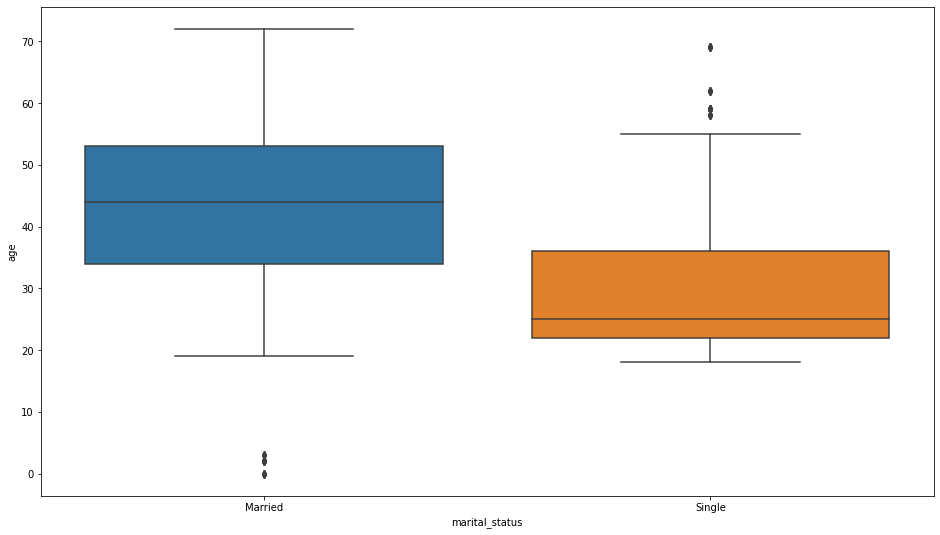

In [73]:
fig, axes = plt.subplots(1, 1, figsize=(16,9))
sns.boxplot( y="age", x="marital_status", data=df, orient='v')

plt.show()

In [74]:
df_impute = df[['age','gender','income','marital_status']]
df_impute['marital_status'] = df_impute['marital_status'].map({'Married':0,'Single':1})

imputer = IterativeImputer(initial_strategy='median', random_state=0)
df_impute = imputer.fit_transform(df_impute)
df_impute = pd.DataFrame(data=df_impute,columns=['age','gender','income','marital_status'])

print('Null check :',df_impute.isna().sum().sum())
print('')
print('Data size :',df_impute.shape)

Null check : 0

Data size : (5020, 4)


In [75]:
df['marital_status'] = df_impute['marital_status'].astype('int')
df.isna().sum()

transactionid     0
customerid        0
date              0
productid         0
price_cust        0
qty               0
totalamount       0
storeid           0
age               0
gender            0
marital_status    0
income            0
product_name      0
price_prod        0
storename         0
groupstore        0
type              0
dtype: int64

In [76]:
df.head()

,transactionid,customerid,date,productid,price_cust,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_prod,storename,groupstore,type
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,0,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,1,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,0,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,1,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,0,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade


In [77]:
# df.to_csv("clean-data.csv", index=False)